In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

class HyperParams:
    pass
hyperparams = HyperParams()

hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 300
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0001_0010"
MODEL_NAME = "0001_0010-64-aeconnect-xxe4"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.1418
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.2947

from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelD as train
import ReportsK as reports
import AEConnectionsF as model_factory

In [4]:
##################
# MODEL DEFINITION
##################
model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 64, 64, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   18496       leaky_re_lu[0][0]                
______________________________________________________________________________________________

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = \
            dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = \
            dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/
Noisy files:19657
Nitid files:19657
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/validation/
Noisy files:4900
Nitid files:4900


In [6]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)


checkpoint_filepath = os.path.abspath(os.path.join('../../../saves/') + MODEL_NAME \
                                      + "_checkpoint_" + '_weights_{epoch:02d}-{val_loss:.2f}')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 50, \
                 callbacks=[model_checkpoint_callback] )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/300
615/615 [==============================] - 36s 46ms/step - loss: 0.0643 - val_loss: 0.0475
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-aeconnect-xxe4_checkpoint__weights_01-0.05\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0428 - val_loss: 0.0449
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-aeconnect-xxe4_checkpoint__weights_02-0.04\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0413 - val_loss: 0.0391
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-aeconnect-xxe4_checkpoint__weights_03-0.04\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0393 - val_loss: 0.0332
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-aeconnect-xxe4_checkpoint__weights_04-0.03\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 5/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0312 - val_loss: 0.0293
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-aeconnect-xxe4_checkpoint__weights_05-0.03\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 6/300
615/615 [==============================] - 29s 46ms/step - loss: 0.0283 - val_loss: 0.0324
Epoch 7/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0268 - val_loss: 0.0270
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-aeconnect-xxe4_checkpoint__weights_07-0.03\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 8/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0260 - val_loss: 0.0268
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-aeconnect-xxe4_checkpoint__weights_08-0.03\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 9/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0253 - val_loss: 0.0362
Epoch 10/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0246 - val_loss: 0.0252
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-aeconnect-xxe4_checkpoint__weights_10-0.03\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 11/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0240 - val_loss: 0.0254
Epoch 12/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0235 - val_loss: 0.0279
Epoch 13/300
615/615 [==============================] - 29s 47ms/step - loss: 0.0231 - val_loss: 0.0253
Epoch 14/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0229 - val_loss: 0.0257
Epoch 15/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0226 - val_loss: 0.0249
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-aeconnect-xxe4_checkpoint__weights_15-0.02\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 16/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0222 - val_loss: 0.0276
Epoch 17/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0221 - val_loss: 0.0243
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-aeconnect-xxe4_checkpoint__weights_17-0.02\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 18/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0219 - val_loss: 0.0256
Epoch 19/300
615/615 [==============================] - 29s 46ms/step - loss: 0.0214 - val_loss: 0.0235
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-aeconnect-xxe4_checkpoint__weights_19-0.02\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 20/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0214 - val_loss: 0.0256
Epoch 21/300
615/615 [==============================] - 28s 45ms/step - loss: 0.0210 - val_loss: 0.0241
Epoch 22/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0208 - val_loss: 0.0278
Epoch 23/300
615/615 [==============================] - 28s 45ms/step - loss: 0.0207 - val_loss: 0.0254
Epoch 24/300
615/615 [==============================] - 28s 45ms/step - loss: 0.0207 - val_loss: 0.0241
Epoch 25/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0207 - val_loss: 0.0295
Epoch 26/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0202 - val_loss: 0.0239
Epoch 27/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0201 - val_loss: 0.0237
Epoch 28/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0198 - val_loss: 0.0239
Epoch 29/300
615/615 [==============================] - 28s 46ms

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 30/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0194 - val_loss: 0.0240
Epoch 31/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0195 - val_loss: 0.0294
Epoch 32/300
615/615 [==============================] - 29s 46ms/step - loss: 0.0194 - val_loss: 0.0241
Epoch 33/300
615/615 [==============================] - 29s 46ms/step - loss: 0.0190 - val_loss: 0.0261
Epoch 34/300
615/615 [==============================] - 29s 46ms/step - loss: 0.0190 - val_loss: 0.0235
Epoch 35/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0188 - val_loss: 0.0239
Epoch 36/300
615/615 [==============================] - 29s 46ms/step - loss: 0.0188 - val_loss: 0.0241
Epoch 37/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0184 - val_loss: 0.0250
Epoch 38/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0183 - val_loss: 0.0272
Epoch 39/300
615/615 [==============================] - 28s 46ms

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 40/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0180 - val_loss: 0.0236
Epoch 41/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0178 - val_loss: 0.0234
Epoch 42/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0176 - val_loss: 0.0249
Epoch 43/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0180 - val_loss: 0.0245
Epoch 44/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0173 - val_loss: 0.0244
Epoch 45/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0170 - val_loss: 0.0258
Epoch 46/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0171 - val_loss: 0.0249
Epoch 47/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0167 - val_loss: 0.0262
Epoch 48/300
615/615 [==============================] - 28s 46ms/step - loss: 0.0165 - val_loss: 0.0254
Epoch 49/300
615/615 [==============================] - 28s 46ms

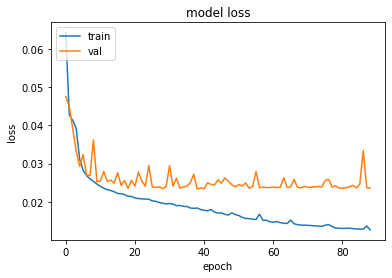

Best Epoch:39


In [7]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [8]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Black image found
Black image found
Images count =4900
Best RMSENZ  =4760 (0.97)
Best MAENZ   =4765 (0.97)
Best PSNR    =4760 (0.97)
Best Accuracy=4671 (0.95)
RMSE-NZ  Pred=0.0301  Noisy=0.1031
MAE-NZ   Pred=0.0233  Noisy=0.0937
PSNR     Pred=18.0 dB Noisy=8.8 dB
Accuracy Pred=0.38    Noisy=0.12
SSM      Pred=0.80    Noisy=0.43
HOG MSE  Pred=0.07    Noisy=0.08


In [9]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-aeconnect-xxe4\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [10]:
reports.saveMetrics( DEST_TESTS, MODEL_NAME, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test/
Noisy files:17
Nitid files:17
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_00_2_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_00_2_nitid_idx008.tif


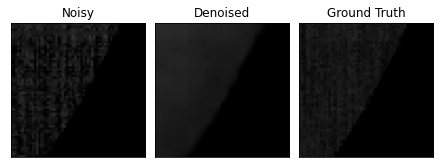

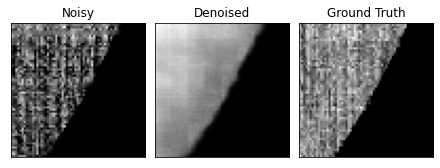

RMSE-NZ  Pred=0.0320  Noisy=0.0423 BEST
MAE-NZ   Pred=0.0194  Noisy=0.0298 BEST
PSNR     Pred=13.5 dB Noisy=11.1 dB BEST
Accuracy Pred=0.54    Noisy=0.36 BEST
SSM      Pred=0.79    Noisy=0.64
HOG MSE  Pred=0.04    Noisy=0.01
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_01_5_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_01_5_nitid_idx017.tif


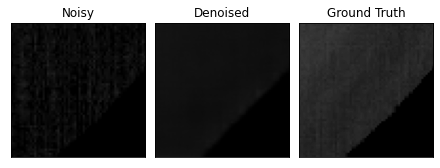

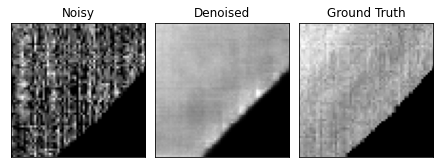

RMSE-NZ  Pred=0.0853  Noisy=0.1180 BEST
MAE-NZ   Pred=0.0740  Noisy=0.1096 BEST
PSNR     Pred=8.9 dB Noisy=6.1 dB BEST
Accuracy Pred=0.21    Noisy=0.07 BEST
SSM      Pred=0.64    Noisy=0.61
HOG MSE  Pred=0.03    Noisy=0.09
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_02_04_9_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_02_04_9_nitid_idx146.tif


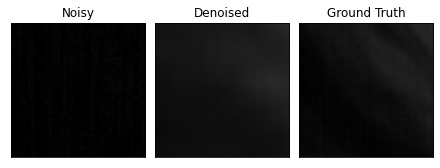

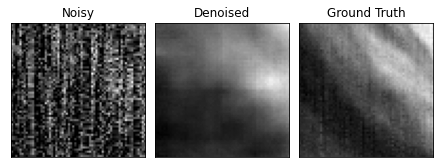

RMSE-NZ  Pred=0.0309  Noisy=0.0587 BEST
MAE-NZ   Pred=0.0273  Noisy=0.0477 BEST
PSNR     Pred=14.2 dB Noisy=8.6 dB BEST
Accuracy Pred=0.13    Noisy=0.13 BEST
SSM      Pred=0.80    Noisy=0.22
HOG MSE  Pred=0.05    Noisy=0.07
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_11_nitid_idx134.tif


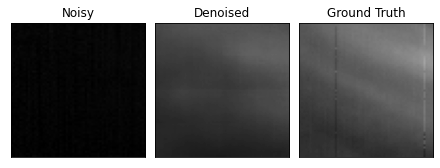

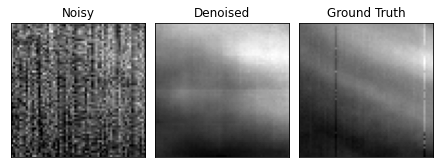

RMSE-NZ  Pred=0.1080  Noisy=0.3357 BEST
MAE-NZ   Pred=0.1008  Noisy=0.3214 BEST
PSNR     Pred=15.4 dB Noisy=5.6 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.82    Noisy=0.14
HOG MSE  Pred=0.08    Noisy=0.11
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_13_nitid_idx134.tif


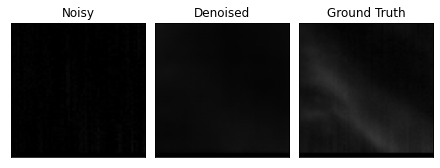

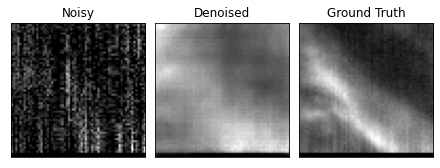

RMSE-NZ  Pred=0.0548  Noisy=0.0869 BEST
MAE-NZ   Pred=0.0417  Noisy=0.0747 BEST
PSNR     Pred=11.7 dB Noisy=7.7 dB BEST
Accuracy Pred=0.25    Noisy=0.01 BEST
SSM      Pred=0.75    Noisy=0.37
HOG MSE  Pred=0.04    Noisy=0.11
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_3_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_3_nitid_idx134.tif


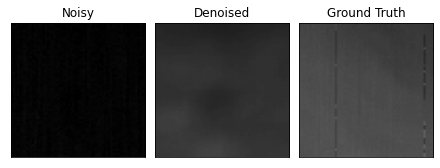

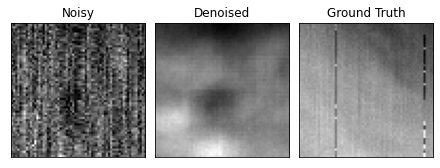

RMSE-NZ  Pred=0.0947  Noisy=0.2662 BEST
MAE-NZ   Pred=0.0921  Noisy=0.2643 BEST
PSNR     Pred=12.0 dB Noisy=3.1 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.82    Noisy=0.16
HOG MSE  Pred=0.09    Noisy=0.10
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_5_nitid_idx134.tif


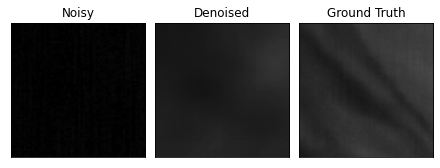

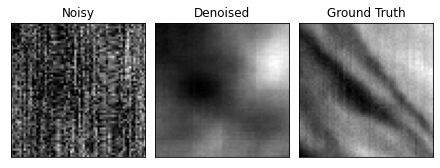

RMSE-NZ  Pred=0.0619  Noisy=0.1729 BEST
MAE-NZ   Pred=0.0572  Noisy=0.1686 BEST
PSNR     Pred=13.3 dB Noisy=4.4 dB BEST
Accuracy Pred=0.02    Noisy=0.00 BEST
SSM      Pred=0.81    Noisy=0.18
HOG MSE  Pred=0.09    Noisy=0.15
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_04_00_10_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_04_00_10_nitid_idx008.tif


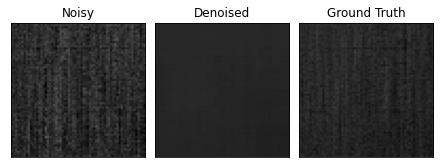

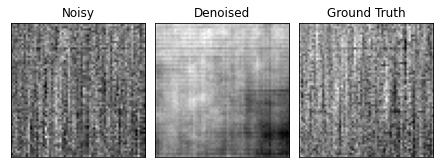

RMSE-NZ  Pred=0.0263  Noisy=0.0606 BEST
MAE-NZ   Pred=0.0209  Noisy=0.0478 BEST
PSNR     Pred=19.3 dB Noisy=12.0 dB BEST
Accuracy Pred=0.30    Noisy=0.15 BEST
SSM      Pred=0.62    Noisy=0.32
HOG MSE  Pred=0.03    Noisy=0.03
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_04_03_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_04_03_5_nitid_idx134.tif


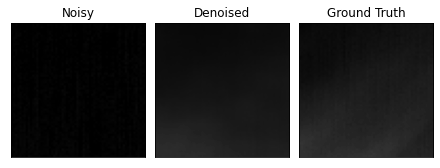

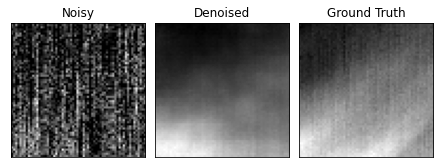

RMSE-NZ  Pred=0.0276  Noisy=0.1061 BEST
MAE-NZ   Pred=0.0239  Noisy=0.0983 BEST
PSNR     Pred=17.5 dB Noisy=5.8 dB BEST
Accuracy Pred=0.19    Noisy=0.00 BEST
SSM      Pred=0.92    Noisy=0.22
HOG MSE  Pred=0.14    Noisy=0.04
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_05_03_8_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_05_03_8_nitid_idx134.tif


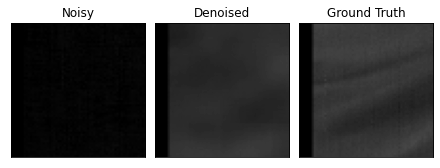

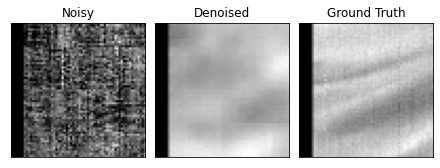

RMSE-NZ  Pred=0.0482  Noisy=0.1969 BEST
MAE-NZ   Pred=0.0370  Noisy=0.1941 BEST
PSNR     Pred=15.4 dB Noisy=3.2 dB BEST
Accuracy Pred=0.27    Noisy=0.00 BEST
SSM      Pred=0.90    Noisy=0.16
HOG MSE  Pred=0.03    Noisy=0.24
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0353_09_00_15_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0353_09_00_15_nitid_idx008.tif


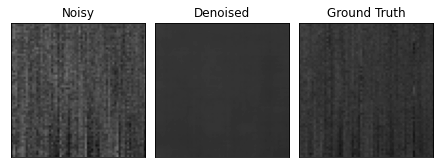

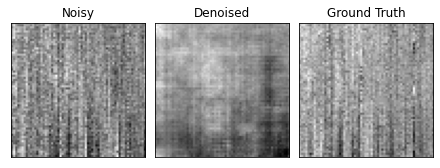

RMSE-NZ  Pred=0.0269  Noisy=0.0925 BEST
MAE-NZ   Pred=0.0208  Noisy=0.0774 BEST
PSNR     Pred=20.9 dB Noisy=10.1 dB BEST
Accuracy Pred=0.32    Noisy=0.06 BEST
SSM      Pred=0.63    Noisy=0.30
HOG MSE  Pred=0.08    Noisy=0.03
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_00_5_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_00_5_nitid_idx008.tif


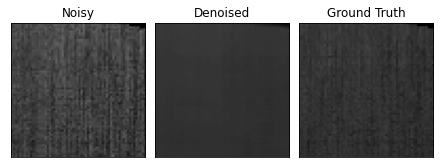

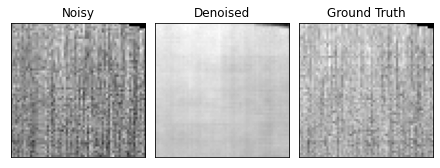

RMSE-NZ  Pred=0.0231  Noisy=0.0770 BEST
MAE-NZ   Pred=0.0178  Noisy=0.0644 BEST
PSNR     Pred=21.7 dB Noisy=11.2 dB BEST
Accuracy Pred=0.36    Noisy=0.08 BEST
SSM      Pred=0.69    Noisy=0.36
HOG MSE  Pred=0.22    Noisy=0.03
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_01_7_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_01_7_nitid_idx017.tif


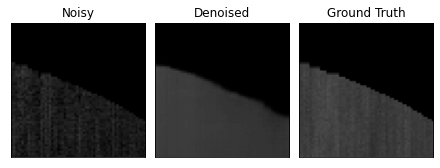

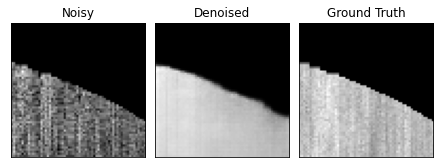

RMSE-NZ  Pred=0.0271  Noisy=0.1235 BEST
MAE-NZ   Pred=0.0148  Noisy=0.1063 BEST
PSNR     Pred=21.4 dB Noisy=8.2 dB BEST
Accuracy Pred=0.59    Noisy=0.19 BEST
SSM      Pred=0.85    Noisy=0.67
HOG MSE  Pred=0.05    Noisy=0.01
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0618_03_01_9_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0618_03_01_9_nitid_idx017.tif


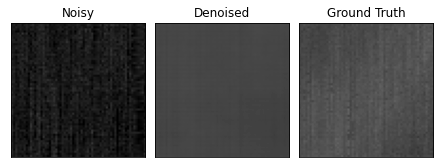

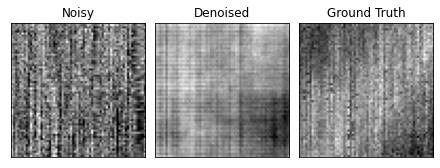

RMSE-NZ  Pred=0.0462  Noisy=0.2174 BEST
MAE-NZ   Pred=0.0398  Noisy=0.2121 BEST
PSNR     Pred=18.7 dB Noisy=5.2 dB BEST
Accuracy Pred=0.11    Noisy=0.00 BEST
SSM      Pred=0.71    Noisy=0.26
HOG MSE  Pred=0.06    Noisy=0.05
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_00_04_11_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_00_04_11_nitid_idx146.tif


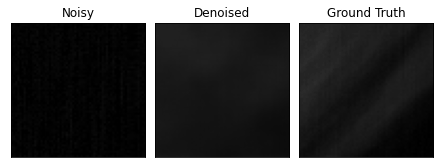

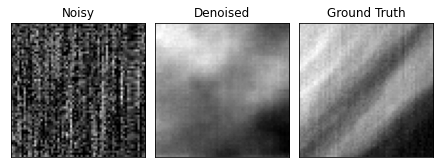

RMSE-NZ  Pred=0.0264  Noisy=0.0873 BEST
MAE-NZ   Pred=0.0216  Noisy=0.0780 BEST
PSNR     Pred=16.6 dB Noisy=6.2 dB BEST
Accuracy Pred=0.26    Noisy=0.06 BEST
SSM      Pred=0.85    Noisy=0.28
HOG MSE  Pred=0.08    Noisy=0.17
******************************************************
Index:15
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_01_00_2_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_01_00_2_nitid_idx008.tif


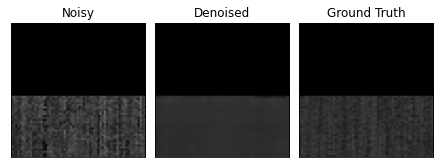

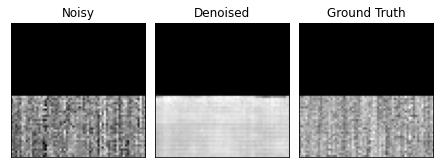

RMSE-NZ  Pred=0.0221  Noisy=0.0789 BEST
MAE-NZ   Pred=0.0119  Noisy=0.0631 BEST
PSNR     Pred=22.3 dB Noisy=11.2 dB BEST
Accuracy Pred=0.66    Noisy=0.09 BEST
SSM      Pred=0.78    Noisy=0.66
HOG MSE  Pred=0.22    Noisy=0.02
******************************************************
Index:16
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0726_03_01_15_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0726_03_01_15_nitid_idx017.tif


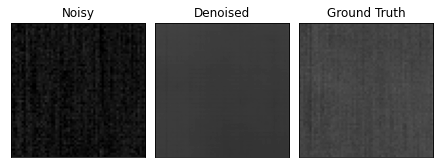

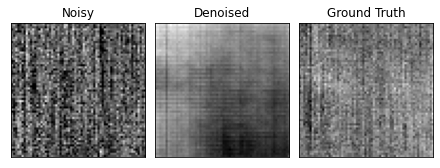

RMSE-NZ  Pred=0.0487  Noisy=0.2053 BEST
MAE-NZ   Pred=0.0431  Noisy=0.2012 BEST
PSNR     Pred=17.2 dB Noisy=4.7 dB BEST
Accuracy Pred=0.07    Noisy=0.00 BEST
SSM      Pred=0.74    Noisy=0.25
HOG MSE  Pred=0.05    Noisy=0.05
******************************************************


In [11]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
                dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
                dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )